# DS-288: Competency Demo

## -- Noam Benkler

---
# Introduction

This is the competency demo for my Master’s in Data Science capstone project. In this demo, I will explore elements of the WESAD dataset, which I intend to use for my final project. My aim here is to train a simple multi-layer perceptron (MLP) model to predict self-assessment stress scores using heart rate variability (HRV) time-series data.

### Competency Focus

**Objective:** Utilize a simple multi-layer perceptron to predict stress self-assessment scores from HRV biosignals.

- **Data Source:** Wearable Stress and Affect Detection (WESAD) dataset
- **Modeling Technique:** Simple Multi-Layer Perceptron (MLP)
- **Predictor Variable:**
  - **Feature:** Heart Rate Variability - RMSSD (Root Mean Square of Successive Differences)
  - **Measurement Tool:** Empatica E4 Wristband
  - **Units:** Milliseconds
- **Target Variable:**
  - **Feature:** Stress Score
  - **Measurement Tool:** Self-assessment from the Positive and Negative Affect Schedule (PANAS) survey
  - **Units:** Likert Scale (1-5)

---
<!-- 
Feel free to explore the notebook to understand how these elements come together in predicting stress levels based on HRV data. -->

<!-- # DS-288: Competency Demo
## Noam Benkler
---

The below notebook comprises the competency demo for my Masters in Data Science capstone project. During this demo, I will explore elements of the WESAD dataset, which I intend to use for my final project, as well as build a simple multi-layer perceptron model with the goal of predicting individual self-assesment stress scores using heart rate variability timeseries data. 

**Competency Demo:** Use a simple multi-layer perceptron to predict stress self-assessment scores from heart rate variability (HRV) biosignals.
- **Data:** Wearable Stress and Affect Detection (WESAD) dataset
- **Modeling Approach:** Simple multi-layer perceptron (MLP)
- **Predictor Variable:** Heart Rate Variability - RMSSD (root mean square of successive differences between normal heartbeats)
    - **Measurement Apparatus:** Empatica E4 wristband
    - **Units:** milliseconds 
- **Target Variable:** Stress Score (Likert Scale 1-5, recorded in the PANAS survey)
    - **Measurement Apparatus:** Self assessment from Positive and Negative Affect Schedule (PANAS) survey
    - **Units:** Likert Scale (1-5)  -->
    


<!-- **Final Project:**
- **Modeling Approach:** inverted-Transformer (iTransformer) +  -->

<!-- While the final project will focus on stress and cognitive performance prediction using multivariate wearable signals -->

<!-- 
During this demo, I will explore elements of the WESAD dataset, which I intend to use for my final project, as well as build a simple multi-layer perceptron model with the goal of predicting individual self-assesment stress scores using heart rate variability timeseries data. 
 -->
<!-- **Variables Used in Competency Demo:**
- **Predictor Variable:** Heart Rate Variability - RMSSD (root mean square of successive differences between normal heartbeats)
- **Target Variable:** Stressed Ranking (Likert Scale 1-5, recorded in the PANAS survey) -->

<!-- --- -->
# Code Import

---
<!-- ### Competency Demo Task: Modeling Stress via Heart Rate Variability  -->

In [1]:
import utils as utils
import demo_plots as dp

The above code imports all necessary classes and functions from the `utils.py` and `demo_plots.py` scripts. Feel free to reference these scripts as part of the competency demo:

> `utils.py` contains all functions and classes for data loading, preprocessing, and feature extraction, as well as model initialization, training, and evaluation.

> `demo_plots.py` contains the functions used to create simple data visualizations exclusively used in this competency demo.


# DATA Introduction
---
## WESAD: A Multimodal Dataset for Wearable Stress and Affect Detection

### Background:
The WESAD dataset includes data from 15 subjects who were monitored during a stress-affect lab study while wearing physiological and motion sensors. 
Subjects were observed over **5 time periods** under **4 affect conditions**:
> **Baseline:** 20-minute periods of standing or sitting while reading magazines.

> **Meditation (x2):** Guided meditation sessions to 'de-excite' subjects between volatile affect sessions.

> **Amusement:** Subjects watched a series of eleven humorous video clips.

> **Stress:** Trier Social Stress Test (TSST), involving public speaking and mental arithmetic tasks.

### Measurement Tools of Interest:

**Empatica E4 Wristband (Biomarker Signals):**
- One physiological sensors assigned to subjects, commonly employed by researchers for full access to clinical-quality, real-time biometric data. Combines EDA and PPG sensors, simultaneously enabling the measurement of sympathetic nervous system activity and heart rate. 
- E4 Sensors: 
  - **PPG Sensor:** Measures Blood Volume Pulse (BVP), from which heart rate variability can be derived
  - **Electrodermal Activity (EDA) Sensor:** Measures the constantly fluctuating changes in certain electrical properties of the skin
  - **3-axis Accelerometer:** Captures motion-based activity
  - **Infrared Thermopile:** Reads peripheral skin temperature
  - **Internal Real-Time Clock:** 5ppm high accuracy time reference
  - **Event Mark Button:** Tag events and link them to physiological signals *(NB: Unfortunately, not utilized during WESAD data collection)*

**Surveys:**
  - Subjects completed three self-assessment surveys after each condition, and one additional survey after the stress condition:
    - **PANAS:** Positive and Negative Affect Schedule
    - **STAI:** Shortened State-Trait Anxiety Inventory
    - **SAM:** Self-Assessment Manikins
    - **SSSQ:** Short Stress State Questionnaire (administered after the stress condition)
    
<!-- **Background:** The WESAD dataset includes data from 15 subjects who were monitored during a stress-affect lab study while wearing physiological and motion sensors. 

Subjects were observed over five periods under three distinct conditions:
- **Baseline (x3):** 20-minute periods of standing or sitting while reading magazines.
- **Amusement:** Subjects watched a series of eleven humorous video clips.
- **Stress:** Trier Social Stress Test (TSST), involving public speaking and mental arithmetic tasks.

**Measurement Tools of Interest:**

- **Empatica E4 Wristband (Biomarker Signals):**
    - One physiological sensors assigned to subjects, commonly employed by researchers for full access to clinical-quality, real-time biometric data. Combines EDA and PPG sensors, simultaneously enabling the measurement of sympathetic nervous system activity and heart rate. 
    - E4 Sensors: 
      - **PPG Sensor:** Measures Blood Volume Pulse (BVP), from which heart rate variability can be derived
      - **Electrodermal Activity (EDA) Sensor:** Measures the constantly fluctuating changes in certain electrical properties of the skin
      - **3-axis Accelerometer:** Captures motion-based activity
      - **Infrared Thermopile:** Reads peripheral skin temperature
      - **Internal Real-Time Clock:** 5ppm high accuracy time reference
      - **Event Mark Button:** Tag events and link them to physiological signals *(NB: Unfortunately, not utilized during WESAD data collection)*

- **Surveys:**
  - Subjects completed three self-assessment surveys after each condition, and one additional survey after the stress condition:
    - **PANAS:** Positive and Negative Affect Schedule
    - **STAI:** Shortened State-Trait Anxiety Inventory
    - **SAM:** Self-Assessment Manikins
    - **SSSQ:** Short Stress State Questionnaire (administered after the stress condition) -->


**NB:** *This dataset provides a comprehensive view of both physiological and psychological responses to different stress-inducing and affective conditions.*

---

<!-- 
**Background:** 15 subjects were monitored during a stress-affect lab study, while wearing physiological and motion sensors. Subjects were monitored over 5 periods under 3 conditions.
- Baseline (x3): 20 minute period of standing/sitting reading magazines.
- Amusement: Subjects watched a set of eleven funny video clips.
- Stress: Trier Social Stress Test (TSST), consisting of public speaking and mental arithmetic.

**Measurement Tools of Interest:** 
- Empatica E4 Wristband (Biomarker Signals)
    - EDA
    - BVP
    - ACC
    - TEMP
- Surveys: Subjects completed 3 self-assessment surveys after each condition (and 1 more after the stress condition)
    - PANAS (Positive and Negative Affect Schedule)
    - shortened STAI (State Trait Anxiety Inventory)
    - SAM (Self-Assessment Manikins)
    - SSSQ (Short Stress State Questionnaire) *\[after stress condition\]*  -->
    
    
   
<!-- **Variables Used in Competency Demo:**
- **Predictor Variable:** Heart Rate Variability - RMSSD (root mean square of successive differences between normal heartbeats)
- **Target Variable:** Stressed Ranking (Likert Scale 1-5, recorded in the PANAS survey) -->

<!-- ![image.png](attachment:image.png) -->


<!-- **Target Variable:** Subjects completed 3 self-assessment surveys after each condition (and 1 more after the stress condition)
- PANAS (Positive and Negative Affect Schedule)
- shortened STAI (State Trait Anxiety Inventory)
- SAM (Self-Assessment Manikins)
- SSSQ (Short Stress State Questionnaire) *\[after stress condition\]*  -->


# DATA Exploration
---

#### (This section will focus on the relevant data from Subject \#3)


## Wearables Data:

For Empatica E4 loading, preprocessing, and feature extraction we use the `FLIRT` python library.

**FLIRT** is a **F**eature generation too**L**k**I**t for wea**R**able da**T**a *(NB:* &#x1f644;*)* that:
    
    1. Focuses on physiological data recorded with (consumer) wearables
    2. Calculates features based on a sliding-window approach.
    
I created the `EmpLoader` class in `utils.py` to handle the loading and processing of the WESAD E4 dataset using FLIRT and merge E4 biomarkers with survey responses. 

Below, we use the `EmpLoader` class to extract the root mean square of successive differences between normal heartbeats (HRV - RMSSD) for Subject \#3 and plot the results using the `hrv_plot` function from `demo_plots.py`

In [2]:
WESAD_path = "../../Data:Code Sources/WESAD/"
subject = 'S3'

EmpLoader = utils.EmpLoader(WESAD_path)
loader, data = EmpLoader.load_emp_data(subject)

HRV features: 100%|██████████| 7353/7353 [00:48<00:00, 151.50it/s]


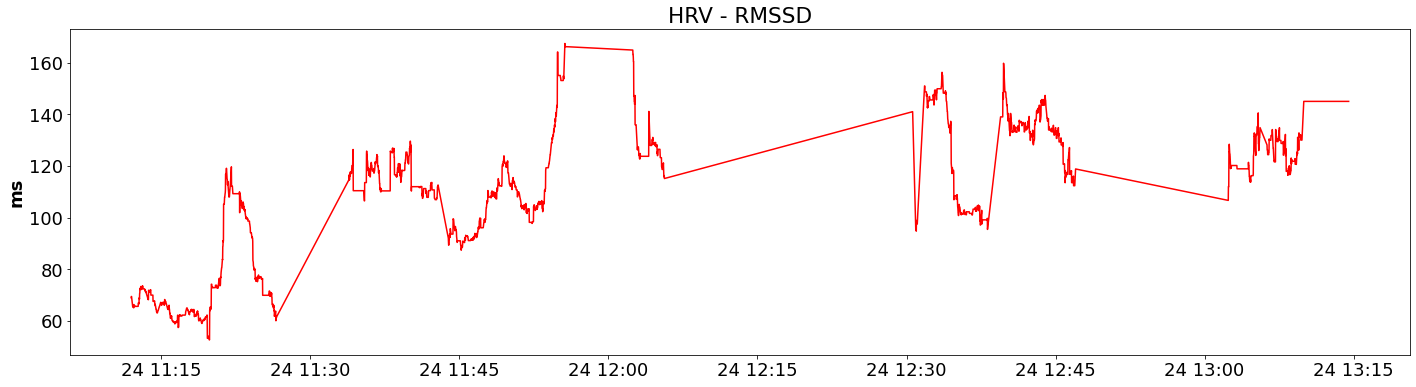

In [3]:
dp.hrv_plot(data)

While not visualized, `EmpLoader` uses the `SurveyDataLoader` class (detailed below) to load and align target labels (e.g. self-reported stress score) with biomarker timeseries segments.

## Survey Data: Self-report questionnaires 

From the WESAD Readme:
> Within the study protocol, after each of the five defined conditions (baseline, amusement, stress, meditation 1, meditation 2), the subjects were asked to fill in a self-report. The self-reports consist of the following questionnaires: PANAS, shortened STAI, SAM (Self-Assessment Manikins, for valence and arousal). Answers are provided on the respective lines in SX_quest.csv. The order of the questionnaires (e.g. the five PANAS-questionnaire lines) is the same as the order of the different conditions. Additionally, after the stress condition, a shortened SSSQ-questionnaire is filled in by the subjects, see the last line in SX_quest.csv.

I created the `SurveyDataLoader` class in `utils.py` to load a clean object with a subjects' responses to these surveys, as well as derive the UTC start and end times for each affect condition after which subjects completed these surveys.

`SurveyDataLoader` is generally used as part of `EmpLoader` but for the purpose of this demo we will be initializing the loader for Subject \#3 independently (below). 

<!-- handle the loading and processing of the WESAD E4 dataset using FLIRT and merge E4 biomarkers with survey responses.  -->

<!-- Below, we use the `EmpLoader` class to extract the root mean square of successive differences between normal heartbeats (HRV - RMSSD) for Subject \#3 and plot the results using the `hrv_plot` function from `demo_plots.py` -->

<!-- The `SurveyDataLoader` class in `utils.py` can be used to load a clean object with a subjects' responses to these surveys -->

In [4]:
loader = utils.SurveyDataLoader(WESAD_path, subject)

Below, we include a radar plot detailing the entire set of PANAS survey responses completed by Subject \#3 after each protocol condition. 

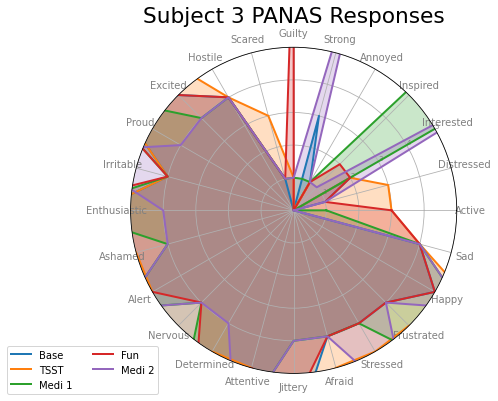

In [5]:
dp.radar_plot(loader)

Many previous studies have concentrated on predicting binary or ternary protocol condition classes:
- **Not Stressed** (Not TSST) **vs. Stressed** (TSST)
- **Resting** (Base or Medi) **vs. Amused** (Fun) **vs. Stressed** (TSST)

Our approach diverges by targeting a more fine-grained prediction of individual survey responses. We map these responses to wearable signal timeseries by aligning the biomarker data with the start and end times of each condition.

In this demo, we focus exclusively on the 'Stressed' response from the PANAS survey. The plot below shows the 'Stressed' survey responses for Subject \#3, recorded after each protocol condition.


<!-- Many previous studies have focused on predicting binary or ternary protocol condition type:
 - Resting vs. Stressed 
 - Resting vs. Amused vs. Stressed

Instead, we intend to focus on more finegrained prediction of individual survey responses, mapping responses to wearable signals using the condition start and end times to align the data. 

The rest of this demo focuses only on the 'Stressed' response from the PANAS survey. The responses to this question for Subject \#3 after each protocol condition are plotted below. -->

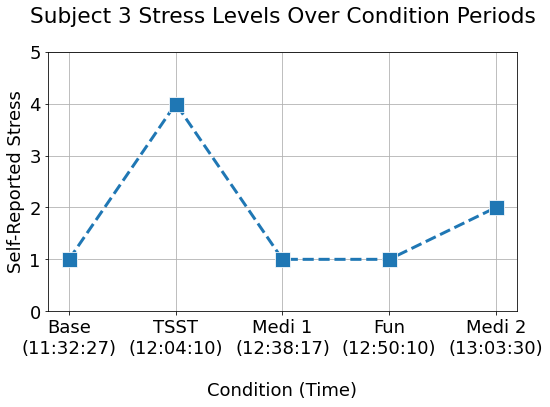

In [6]:
dp.line_plot_stressed(loader)

---

# Modeling
---

**This section comprises our complete pipeline for training and evaluating a simple Multi-layer Perceptron (MLP) regressor to predict PANAS 'Stressed' survey responses using Heart Rate Variability signals.**

We used the following python libraries for the core listed tasks:

<!-- 
| Library  | Task |
|------------|------------------------------|
| flirt | Empatica E4 Loading, Preprocessing & Feature Extracton |
| datetime & pytz |  Temporal Data Alignment       |
| sklearn |  Data Preprocessing (Scaling), Data Segmentation (Train-Test Splitting), & Model Evaluation (rMSE scoring)       |
| pytorch | Neural Network Construction, Training, & Evaluation |
| scipy  | Model Evaluation (k-Tau)                            | -->

| Task  | Library(s) |
|------------|------------------------------|
| Biomarker Data Loading & Feature Extraction | **flirt** |
| Data Cleaning & Preprocessing |  **pandas**, **numpy**, **datetime** & **pytz** (Temporal Data Alignment), **sklearn** (Scaling & Data Segmentation)       |
| Modeling (Neural Network Construction, Training, & Evaluation) |  **pytorch**   |
| Model Evaluation |  **sklearn** (RMSE) & **scipy** (k-Tau)       |
| Plotting |  **matplotlib** & **seaborn**       |
| Progress Monitoring |  **tqdm** |

<!-- | Library  | Task |
|------------|------------------------------|
| flirt | Empatica E4 Loading, Preprocessing & Feature Extracton |
| datetime & pytz |  Temporal Data Alignment       |
| sklearn |  Data Preprocessing (Scaling), Data Segmentation (Train-Test Splitting), & Model Evaluation (rMSE scoring)       |
| pytorch | Neural Network Construction, Training, & Evaluation |
| scipy  | Model Evaluation (k-Tau)                            | -->

<!-- - Empatica E4 Loading, Preprocessing & Feature Extracton:  -->

In order to better understand any of the functions or classes used please reference the `utils.py` script.

## 1. Load Data, Preprocess, & Extract Relevant Features 

**Process:**
1. Initialize the `EmpLoader` class.

2. Call `load_data()`, which:

 <ol style="list-style-type: none;">
     <li>I) Iterates over all subjects and:
         <ul style="list-style-type: none;">
             <li>a. Parses the HRV E4 signal data.</li>
             <li>b. Extracts the relevant predictor features (predictors = hrv_rmssd).</li>
             <li>c. Initializes a `SurveyLoader` class instance for the relevant subject. This:
                 <ul style="list-style-type: none;">
                     <li>i) Loads relevant survey data (target_survey = PANAS).</li>
                     <li>ii) Extracts & converts protocol condition start & end times to UTC for biomarker signal merging.</li>
                     <li>iii) Assigns relevant target scores (target = 'Stressed') to each protocol condition.</li>
                     <li>iv) Returns parsed information to `EmpLoader`.</li>
                 </ul>
             </li>
             <li>d. Splits continuous biomarker signal into vectors covering protocol condition periods using protocol condition start and end times from `SurveyLoader`.</li>
             <li>e. Assigns each biomarker vector the relevant survey response target given protocol condition period.</li>
             <li>f. Adds the parsed and processed data to relevant class objects (`self.X`, `self.y`).</li>
         </ul>
     </li>
     <li>II) Uses maximum vector length to pad biomarker vectors (`self.X`) for consistent vector shape.</li>
 </ol>





<!-- vectors  -->
    
<!--     (starting at protocol condition start time and ending at protocol condition end time) between  -->

In [ ]:
emp_data = utils.EmpLoader(WESAD_path="../../Data:Code Sources/WESAD/", 
                        predictors='hrv_rmssd',
                        target_survey='PANAS', 
                        target='Stressed')
emp_data.load_data()

### 1.1 Split Data into Training & Testing Sets

In [8]:
X_train, X_test, y_train, y_test = utils.split_data(emp_data.X, emp_data.y)

# 2. Modeling

### 2.1 Create Dataloaders for Torch Training

In [9]:
train_loader, test_loader = utils.create_dataloaders(X_train, y_train, X_test, y_test)

### 2.2 Initialize Simple Multi-layer Perceptron Regressor

In [10]:
input_dim = X_train.size(1)
hidden_dim = 10
model = utils.define_model(input_dim, hidden_dim)

### 2.3 Train Regressor & Visualize Loss

/usr/local/lib/python3.9/site-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([2, 1])) that is different to the input size (torch.Size([2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1/10, Loss: 1.9135
Epoch 2/10, Loss: 1.3377
Epoch 3/10, Loss: 1.3101
Epoch 4/10, Loss: 1.0889
Epoch 5/10, Loss: 1.1264
Epoch 6/10, Loss: 1.0533
Epoch 7/10, Loss: 1.1324
Epoch 8/10, Loss: 1.1262
Epoch 9/10, Loss: 1.0101
Epoch 10/10, Loss: 1.0792


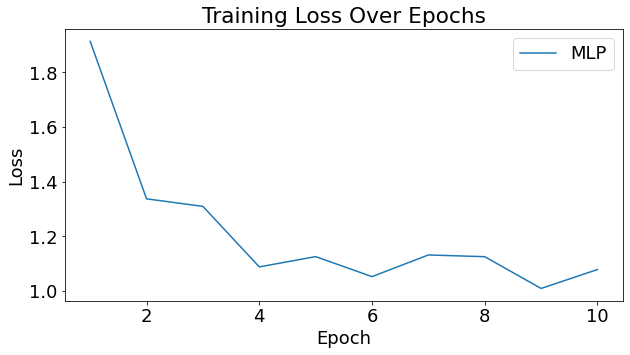

In [11]:
loss_results = utils.train_model(model, train_loader)
utils.visualize_loss({
    'MLP': loss_results,
    })

### 2.4 Evaluate Performance & Visualize Results

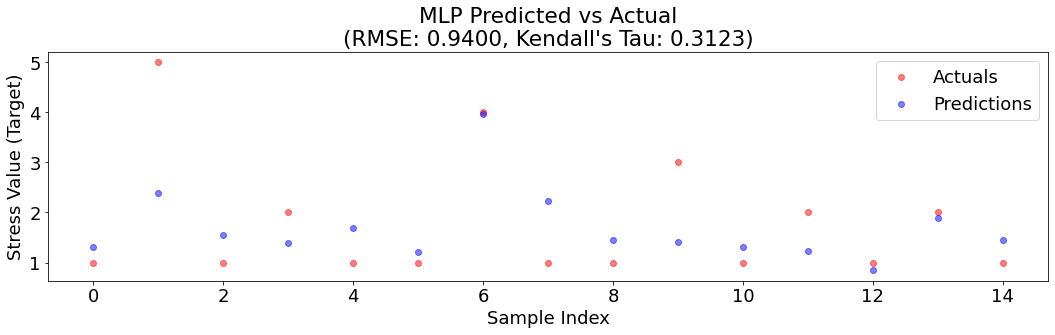

In [12]:
results = utils.evaluate_model(model, X_test, y_test)
utils.visualize_results({
    'MLP': results,
})

---
# Conclusion
---
<!-- comprise a Compentency Demo which  -->
This notebook and accompanying python scripts comprise my compentency demo for the DS-288: Data Science Master's Capstone course. This demo provides an overview on how to handle the WESAD dataset, extract relevant biomarker features and prediction targets, build and train a simple MLP neural network, and evaluate its performance. In order to better understand any of the functions or classes used herein please reference the `utils.py` script.